# SOK-1006 V25
## Arbeidskrav 7 - Detaljhandel i Norge: Estimering av en tilbudsfunksjon

Tilpasset fra mappeoppgave 2 v24.



## Bakgrunn

I arbiedskrav 6 har dere estimert en produktfunksjon for detaljhandel i Norge basert på data i 2022. Nå skal disse resultatene brukes til å estimere en tilbudsfunksjon for en bedrift i denne bransjen. (Dersom du ikke gjorde arbeidskrav 6, kan du bruke egne tall for Z, a, b. Pass på at $a+b \leq 1$.)

### Oppgave - Tilbud til en gjennomsnittlig bedrift


Butikken "Helt midt på treet" er en ganske *gjennomsnittlig* bedrift i en bransje i detaljhandelen. I denne sammenhengen betyr gjennomsnittlig følgende:       

- $Z, a, b$ som du fant i arbeidskrav 6 beskriver produktfunksjonen til bedriften.
- Én timeslønn i denne bedriften tilsvarer gjennomsnittet for detaljhandelen.
- På kort sikt har bedriften kapitalutgifter som tilsvarer gjennomsnittet for detaljhandelen.

I praksis betyr dette at du kan bruke dine estimat på $Z, a, b$ (ta 2 desimalplasser) som bedriftens produktfunksjon i (1), at timelønna er 287 kr i 2022, og at kapitalutgiften er gjennomsnittet av det som du har i datasettet (som du må finne). (Tabell 11421, SSB gir gjennomsnittlig månedslønn i 2022 for en ansatt i gruppe 47 Detaljhandel som 41 290 kr. SSB sier videre at en ansatt i full stilling arbeider 230 dager i året, som utgjør 19.2 dager i snitt pr måned, eller (19.2*7.5=) 144 timer pr måned).          

Vi går ut fra at "Helt midt på treet" har følgende produktfunksjon:


\begin{equation}
   y = ZL^aK_0^{b}\;\;(2)
\end{equation}

Her er $y$ *antall enheter produsert*, $L$ *antall timer arbeidskraft*, mens $K_0$ er kapitalutgiften til bedriften i mill. NOK. (Legg merke til at vi nå blander fysiske og monetære enheter).          

i) Skriv et uttrykk for bedriftens variable kostnader og totale kostnader på kort sikt som en funksjon av mengde produsert ($y$). (Som vi har sett før har Sympy problemer med å løse ligninger av formen $Y=\alpha X^\beta$ for $X$. Dette kan vi løse selv som $X=(\frac{Y}{\alpha})^{\frac{1}{\beta}}$).       

ii) Finn uttrykk for bedriftens grensekostnad og gjennomsnittskostnad (total og variabel).        

iii) Bruk ditt svar til ii) for å tegne bedriftens tilbudskurve i en figur. Forklar figuren nøye.        

iv) Anta at lønnsoppgjøret gir arbeidere i "Helt midt på treet" en lønnsøkning på 5%. Vis hvordan dette påvirker bedriftens tilbud, og forklar intuisjonen bak endringen.



In [2]:
import sympy as sp

# Definer symboler
Z, L, K, a, b, y = sp.symbols('Z L K a b y', positive=True)

# Produksjonsfunksjon
prod_ks = Z * L**a * K**b

# Løs for L som funksjon av y
L_ks = sp.solve(prod_ks - y, L)[0]

# Forenkler uttrykket
sp.simplify(L_ks)

(y/(K**b*Z))**(1/a)

In [9]:
# Setter inn kjente verdier
L_num = L_ks.subs({
    Z: 4.87,
    K: 271.27,
    a: 0.81,
    b: 0.15,
})

L_num

0.0501844138963668*y**1.23456790123457

In [10]:
# Gjør om L_num til en funksjon av y: L(y)
# L_num = (y / (4.87 * 271.27**0.15))**(1/0.81)

# Brukte chatgpt til å hjelpe meg med lamdify
# Gjør om til Python-funksjon
L_func = sp.lambdify(y, L_num, 'numpy')

# Tester den
print(L_func(100))   # f.eks. y = 100
print(L_func(500))   # f.eks. y = 500

14.781028652522483
107.80293629036308


In [16]:
# Lager en funksjon for variable kostnader som funksjon av y
def VC(y):
    return 287 * L_func(y)

# Totale kostnader
def TC(y):
    return 271.27 + VC(y)

In [17]:
# Gjennomsnittlig totalkostnad
def AC(y):
    return TC(y) / y

# Gjennomsnittlig variabel kostnad
def AVC(y):
    return VC(y) / y

In [18]:
TC_expr = 271.27 + 287 * L_num
GK_expr = sp.diff(TC_expr, y)

In [19]:
GK = sp.lambdify(y, GK_expr, 'numpy')

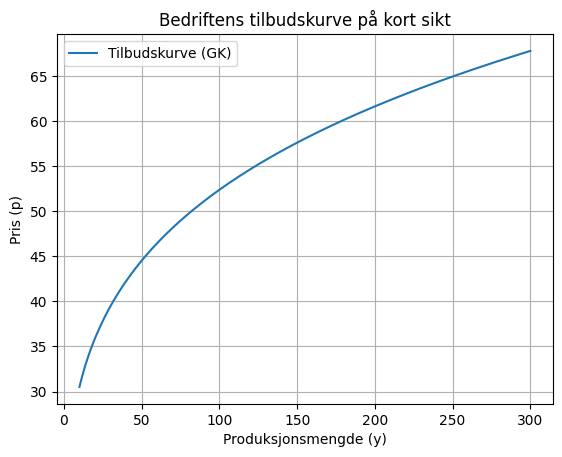

In [21]:
import matplotlib.pyplot as plt
import numpy as np


# Produksjonsnivåer (x-verdier)
y_vals = np.linspace(10, 300, 200)

# Tegn figur
plt.plot(y_vals, GK(y_vals), label="Tilbudskurve (GK)")
plt.xlabel("Produksjonsmengde (y)")
plt.ylabel("Pris (p)")
plt.title("Bedriftens tilbudskurve på kort sikt")
plt.grid(True)
plt.legend()
plt.show()